In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv('/home/omran-xy/Workspace/Cellula/Task one/first inten project.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [5]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

In [6]:
print(df.isnull().sum())
print(df.shape)

Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation         37
booking status               0
dtype: int64
(36285, 17)


In [7]:
df.dropna(subset=['date of reservation'], inplace=True)

Outliers in 'average price ' column using IQR method:
      Booking_ID  number of adults  number of children  \
60      INN00061                 2                   2   
63      INN00064                 1                   0   
114     INN00115                 2                   2   
127     INN00128                 2                   2   
145     INN00146                 1                   0   
...          ...               ...                 ...   
36221   INN36222                 2                   2   
36227   INN36228                 2                   2   
36250   INN36251                 1                   0   
36263   INN36264                 1                   0   
36269   INN36270                 2                   2   

       number of weekend nights  number of week nights type of meal  \
60                            0                      1  Meal Plan 1   
63                            0                      1  Meal Plan 1   
114                           2     

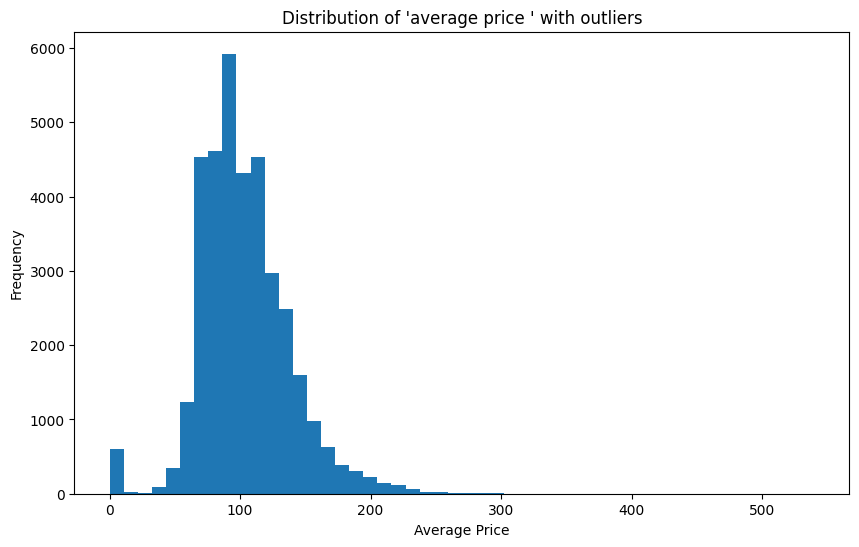

In [8]:

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, col, threshold=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = (df[col] < q1 - threshold * iqr) | (df[col] > q3 + threshold * iqr)
    return df[outliers]

# Detect outliers in the 'average price' column using the IQR method
outliers_iqr = detect_outliers_iqr(df, 'average price ')
print("Outliers in 'average price ' column using IQR method:")
print(outliers_iqr)

# Visualize the distribution of 'average price' with outliers
plt.figure(figsize=(10, 6))
plt.hist(df['average price '], bins=50)
plt.title("Distribution of 'average price ' with outliers")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

# Remove outliers from the dataset (optional)
# df = df[~outliers_zscore.index.isin(outliers_zscore.index)]

In [36]:
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,year
0,INN00001,1,1,2,5,1.0,0,1,224,0,0,0,0,88.00,0,2015-10-02,0,10,2015
1,INN00002,1,0,1,3,0.0,0,1,5,1,0,0,0,106.68,1,2018-11-06,0,11,2018
2,INN00003,2,1,1,3,1.0,0,1,1,1,0,0,0,50.00,0,2018-02-28,1,2,2018
3,INN00004,1,0,0,2,1.0,0,1,211,1,0,0,0,100.00,1,2017-05-20,1,5,2017
4,INN00005,1,0,1,2,0.0,0,1,48,1,0,0,0,77.00,0,2018-04-11,1,4,2018


In [37]:
df.drop(columns=['Booking_ID'], inplace=True)

In [10]:
# Set style for the plots
plt.style.use('seaborn-v0_8-paper')
custom_palette = sns.color_palette("husl", 8)
sns.set_palette(custom_palette)

In [11]:

# Function to plot categorical variables
def plot_categorical(df, column):
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

In [12]:

# Function to plot numeric variables (with both histogram and box plot)
def plot_numeric(df, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram
    sns.histplot(data=df, x=column, kde=True, ax=ax1, color=custom_palette[0])
    ax1.set_title(f'Distribution of {column}', fontsize=16, fontweight='bold')
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    
    # Box plot
    sns.boxplot(data=df, y=column, ax=ax2, color=custom_palette[1])
    ax2.set_title(f'Box Plot of {column}', fontsize=16, fontweight='bold')
    ax2.set_ylabel(column, fontsize=12)
    
    plt.tight_layout()
    plt.show()


In [13]:
# Function to plot numeric variables (histogram only)
def plot_numeric_histogram(df, column):
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=df, x=column, kde=True, color=custom_palette[2])
    plt.title(f'Distribution of {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Add a vertical line for the mean
    mean_val = df[column].mean()
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean_val, plt.ylim()[1], f'Mean: {mean_val:.2f}', 
             horizontalalignment='center', verticalalignment='top', color='red')
    
    plt.tight_layout()
    plt.show()


In [14]:
# Function to plot date variable
def plot_date(df, column):
    # Convert the column to datetime, handling any remaining non-datetime values
    df[column] = pd.to_datetime(df[column], errors='coerce')
    
    # Drop rows with invalid dates after conversion
    df.dropna(subset=[column], inplace=True)
    
    # Extract month and year
    df['month'] = df[column].dt.month
    df['year'] = df[column].dt.year
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Reservations by month
    sns.countplot(data=df, x='month', order=range(1, 13), ax=ax1, palette='coolwarm')
    ax1.set_title('Reservations by Month', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    
    # Reservations by year
    sns.countplot(data=df, x='year', ax=ax2, palette='viridis')
    ax2.set_title('Reservations by Year', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


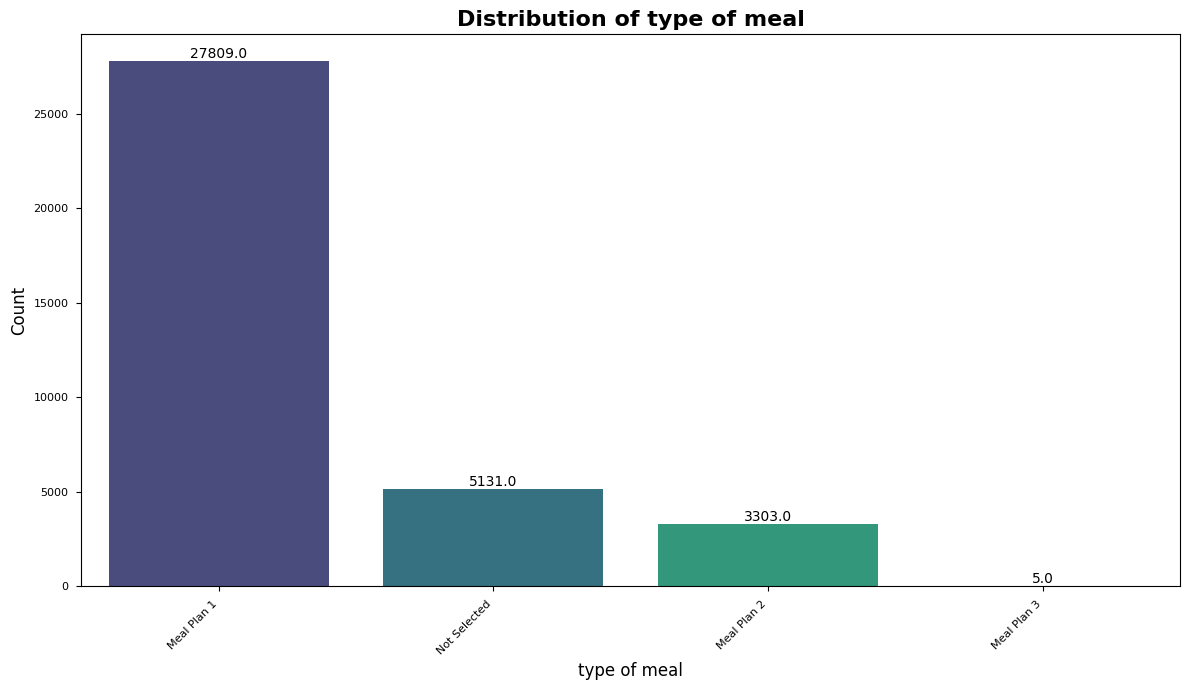

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


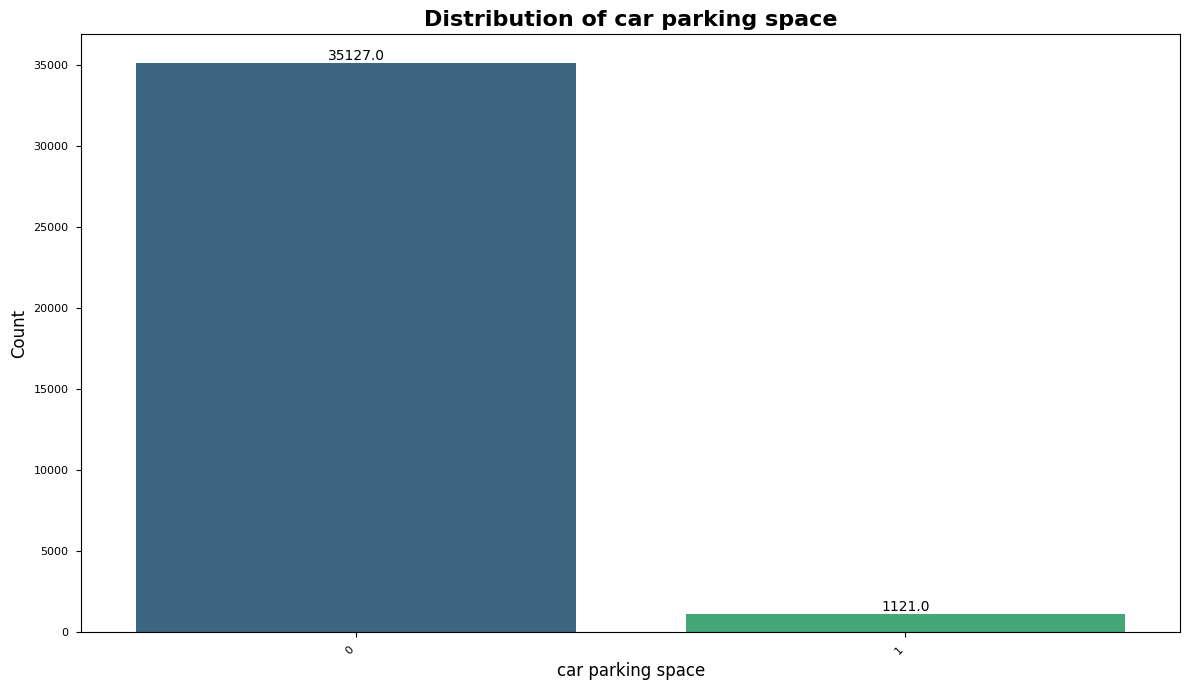

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


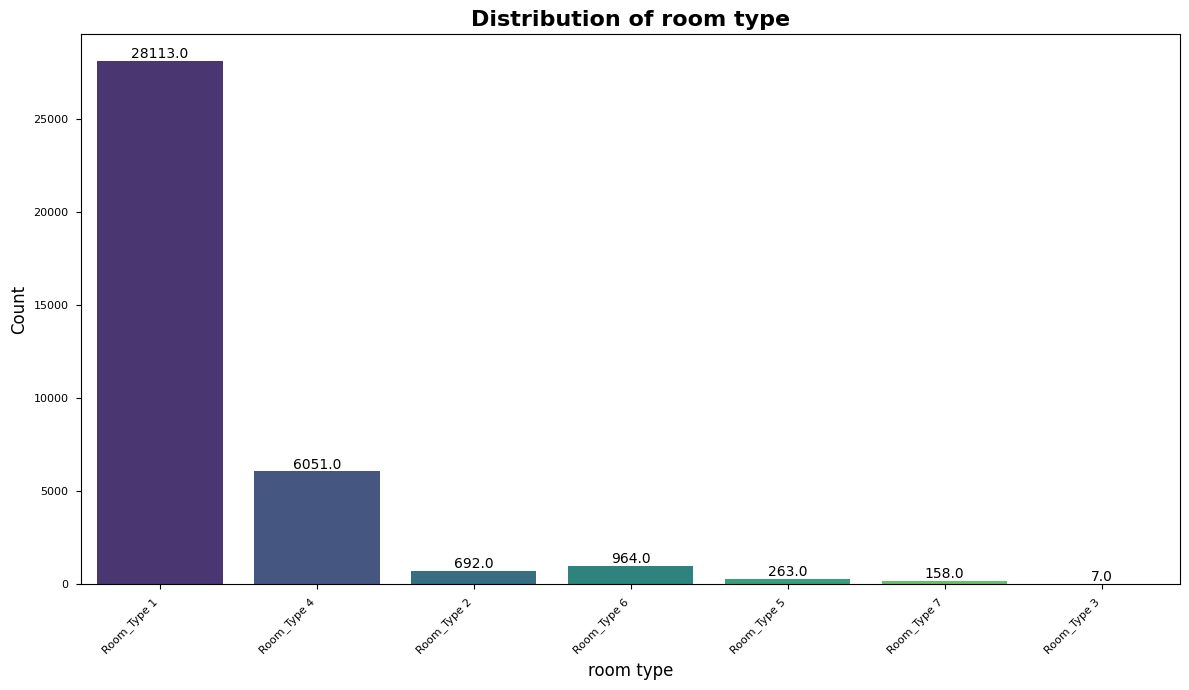

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


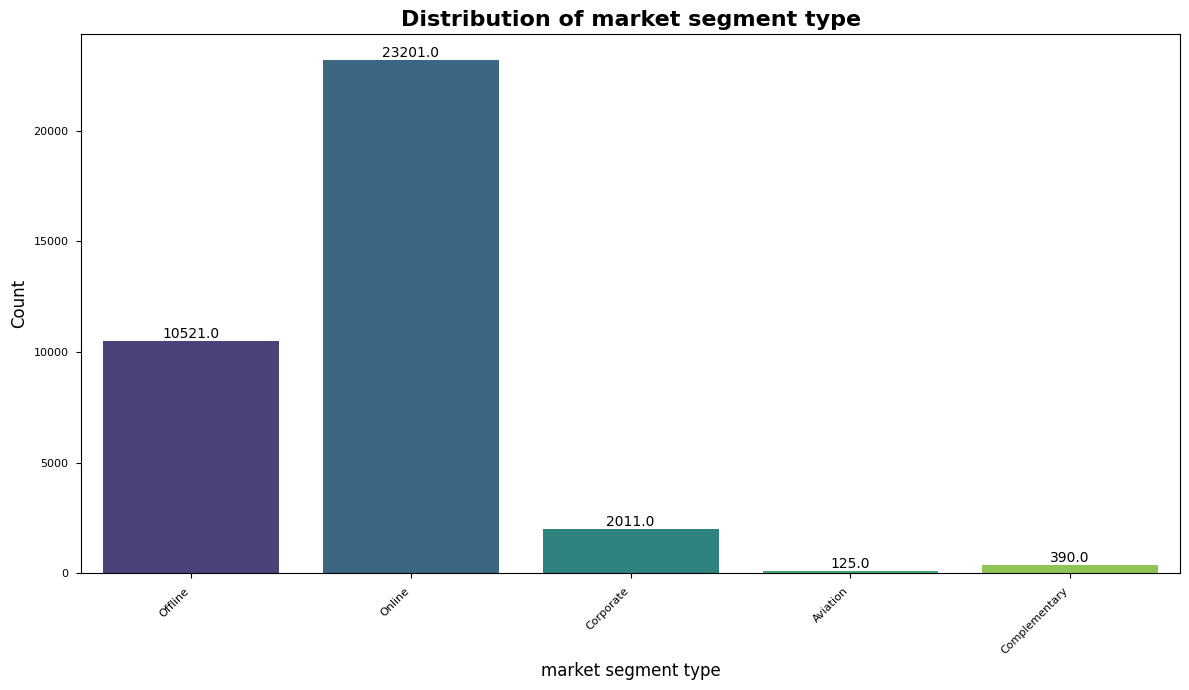

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


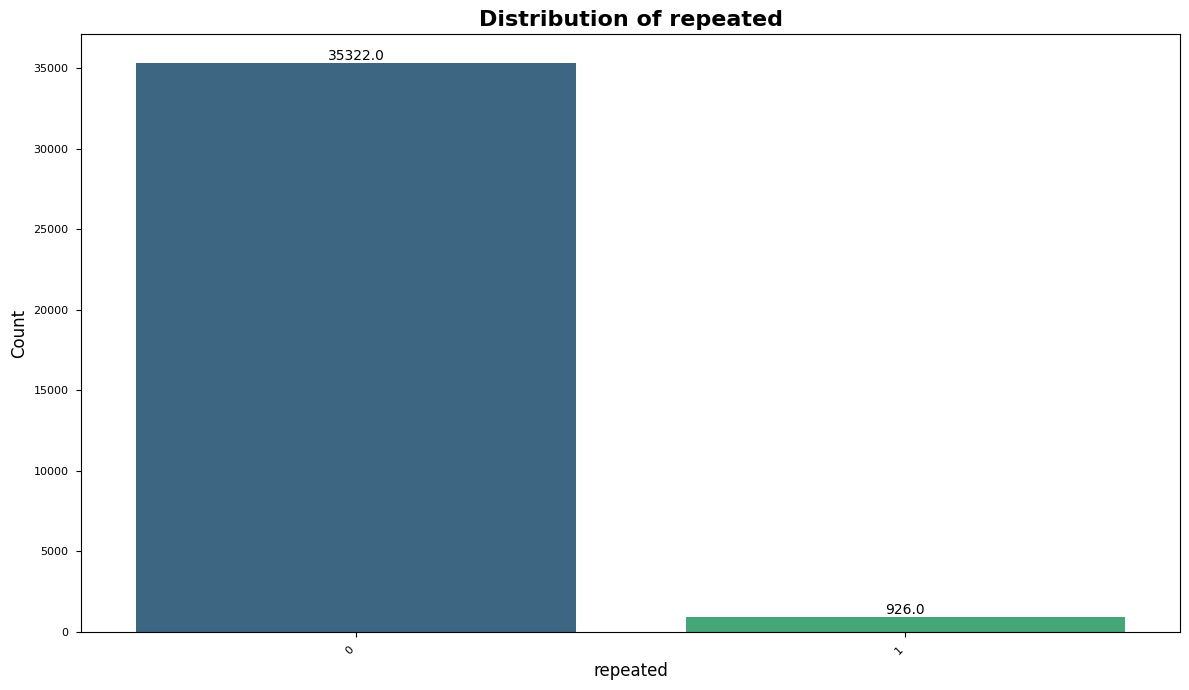

/tmp/ipykernel_2395/2749291960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


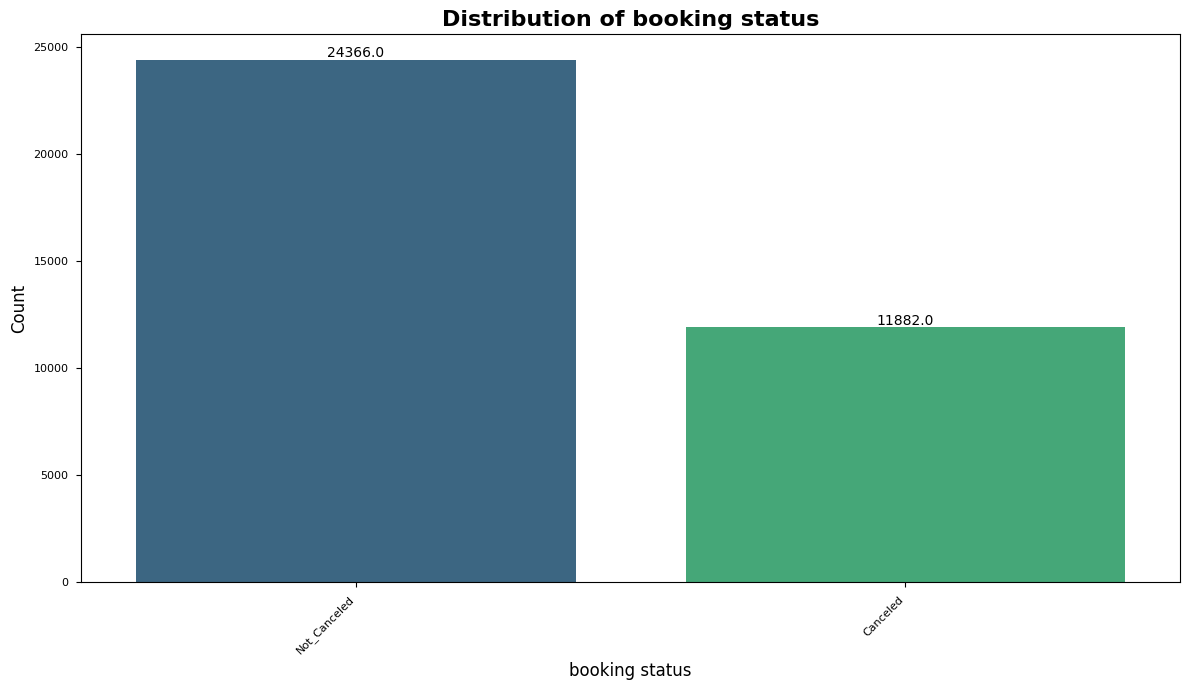

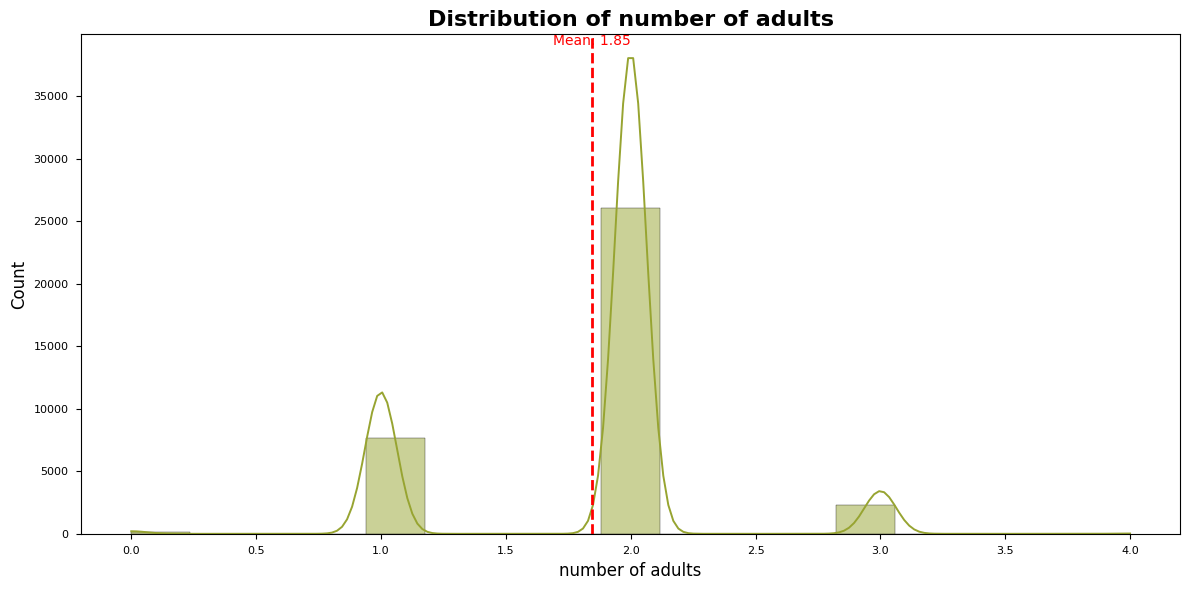

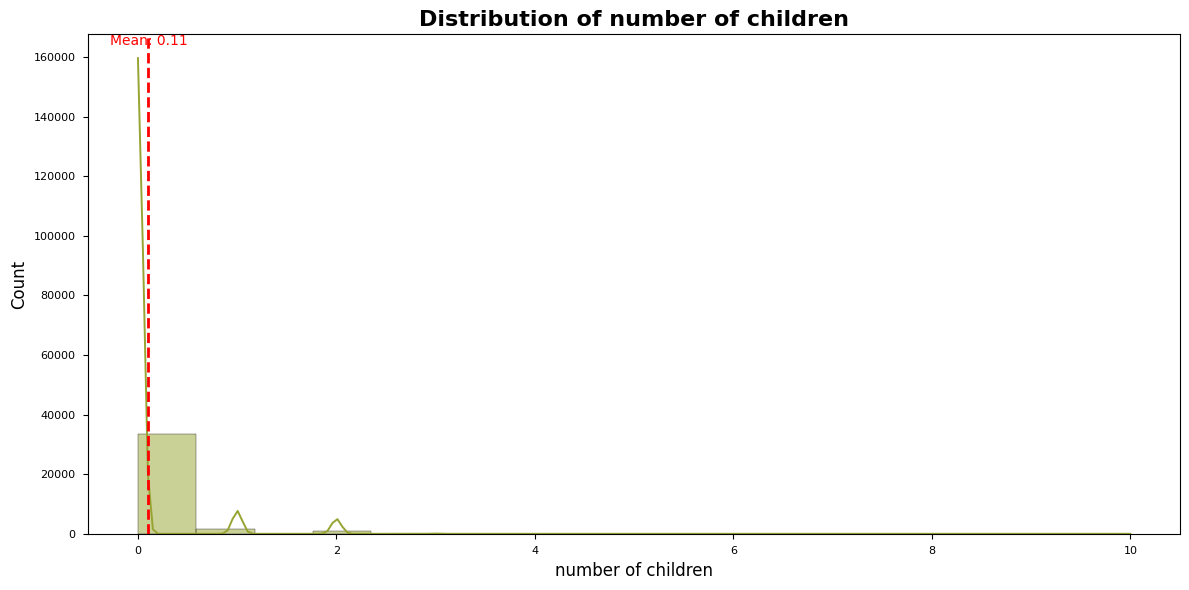

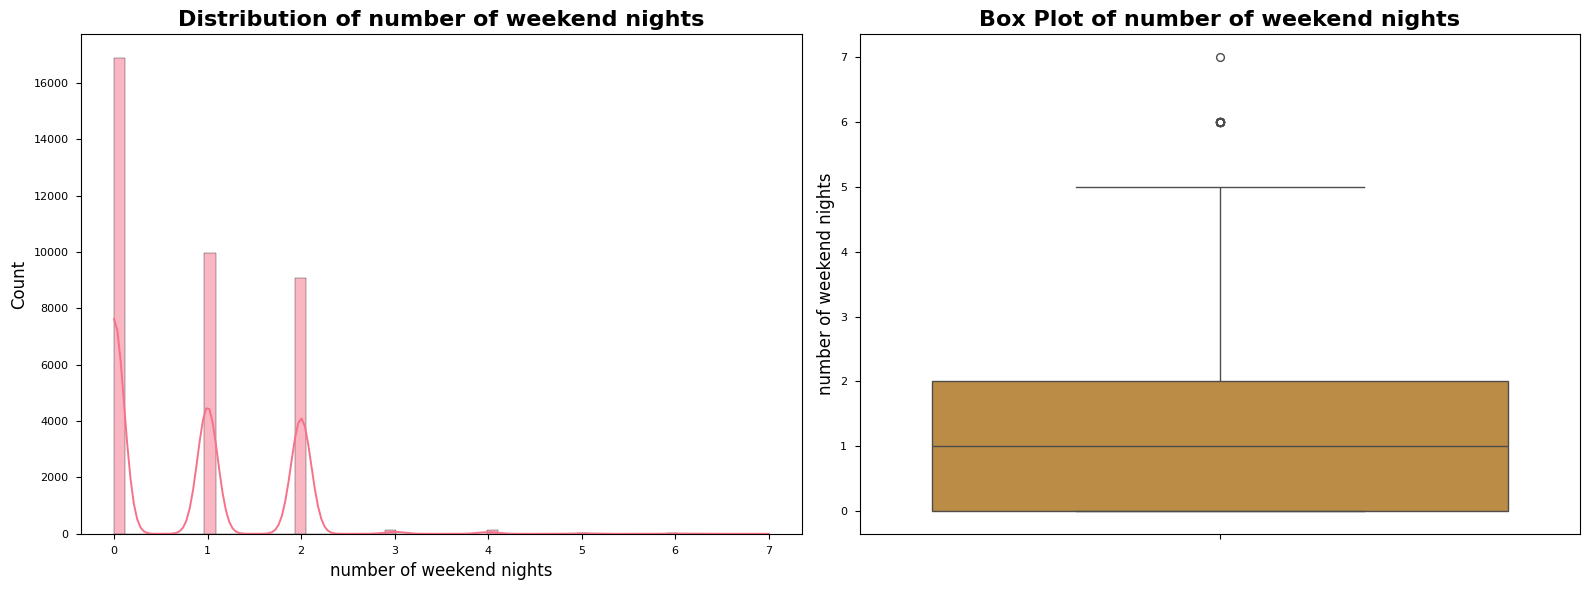

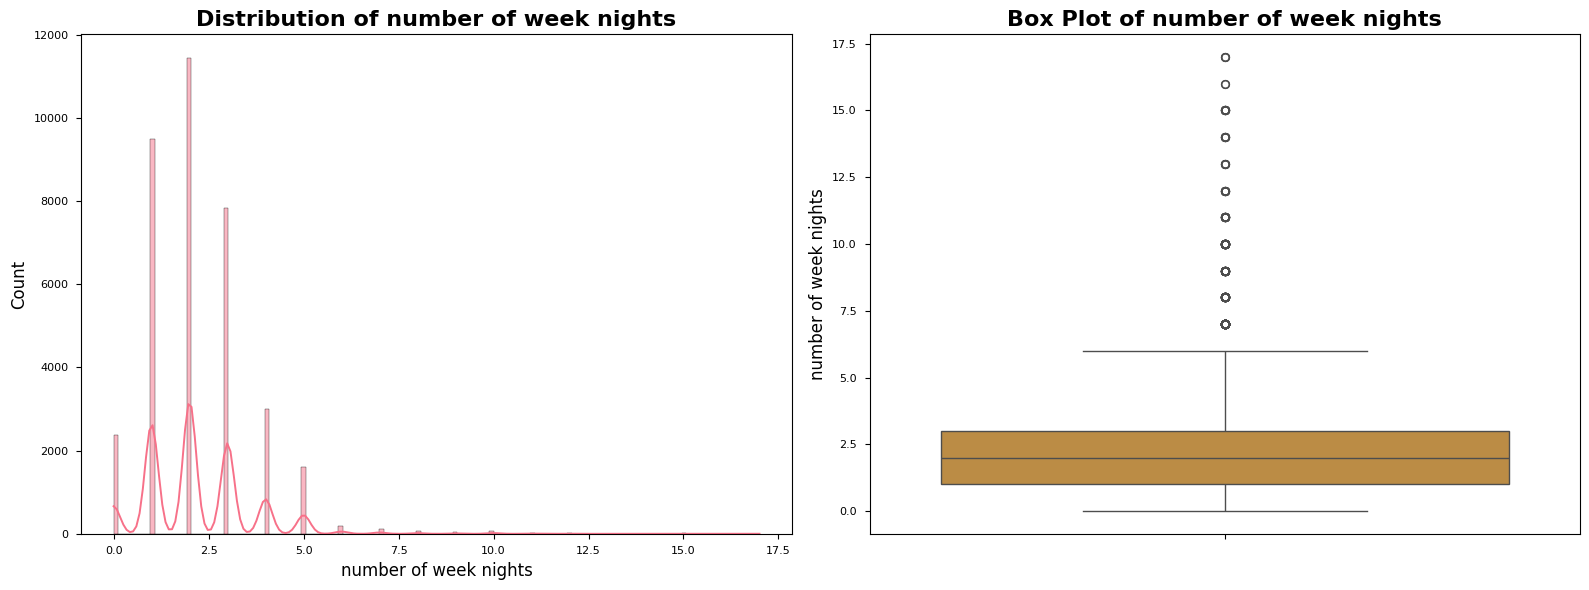

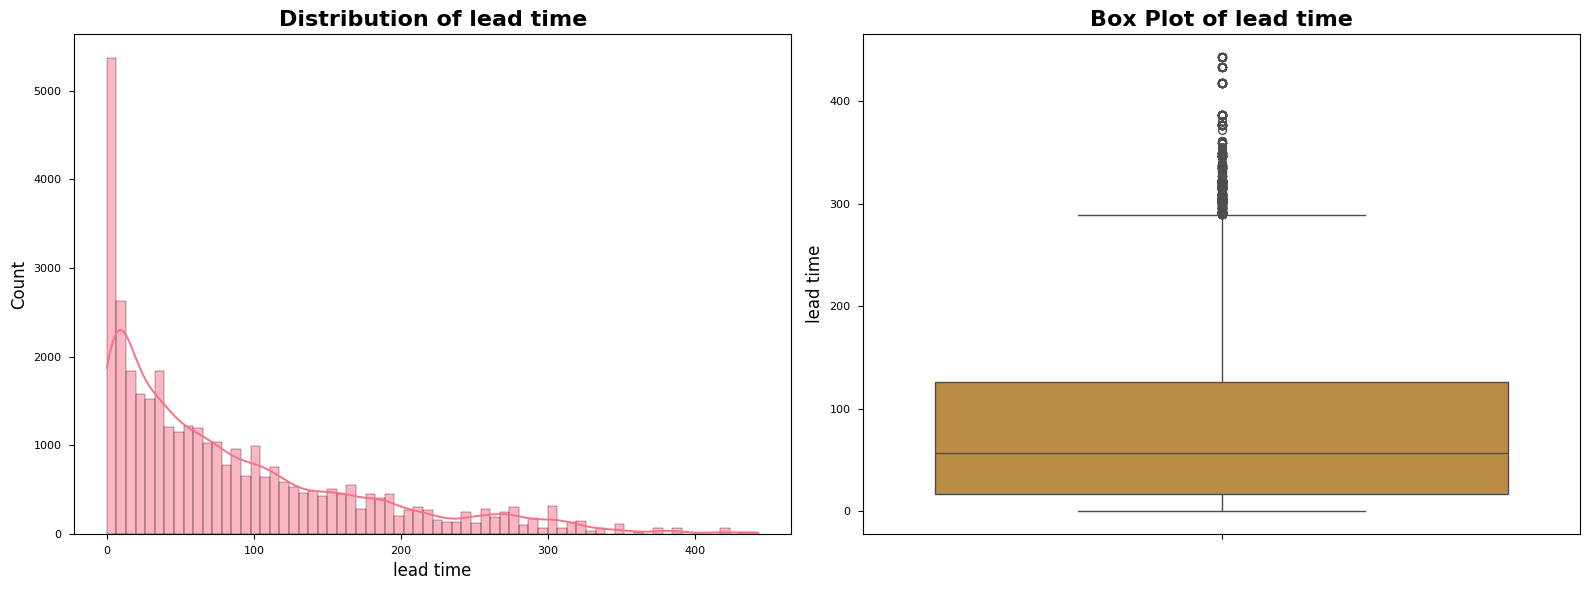

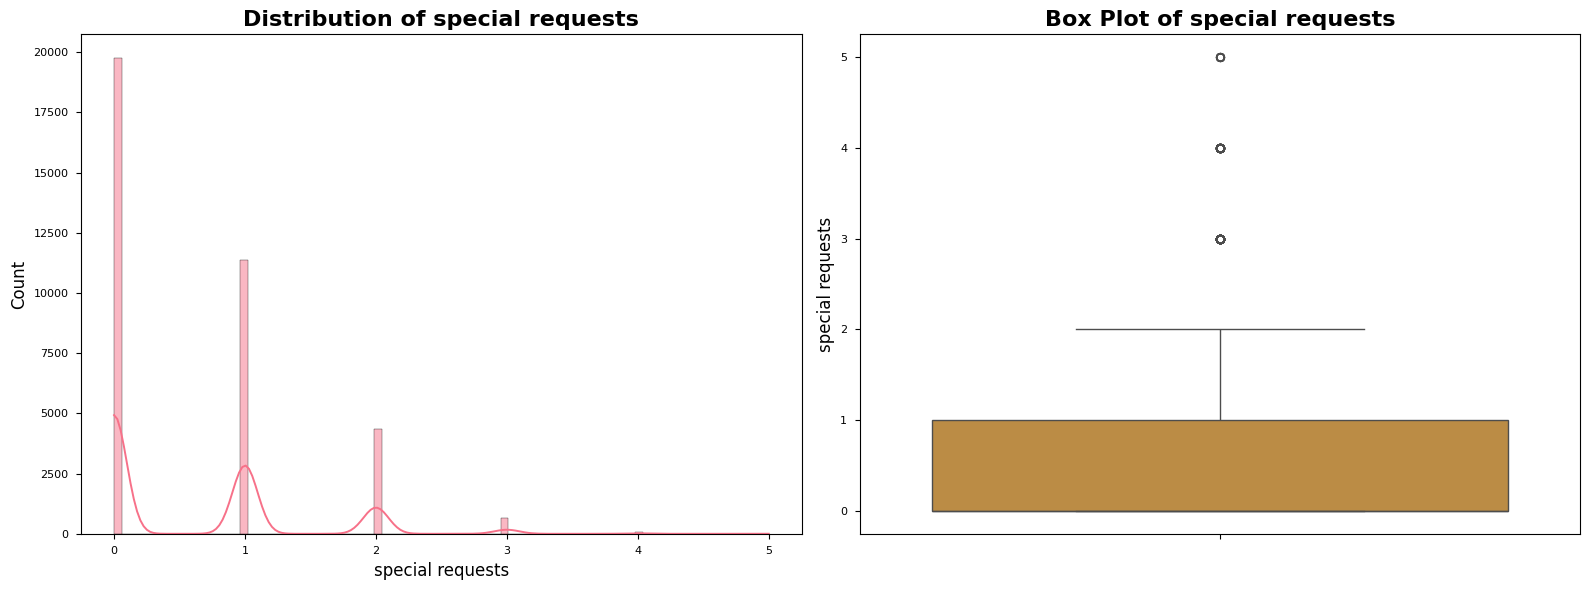

/tmp/ipykernel_2395/1661278535.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', order=range(1, 13), ax=ax1, palette='coolwarm')
/tmp/ipykernel_2395/1661278535.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', ax=ax2, palette='viridis')


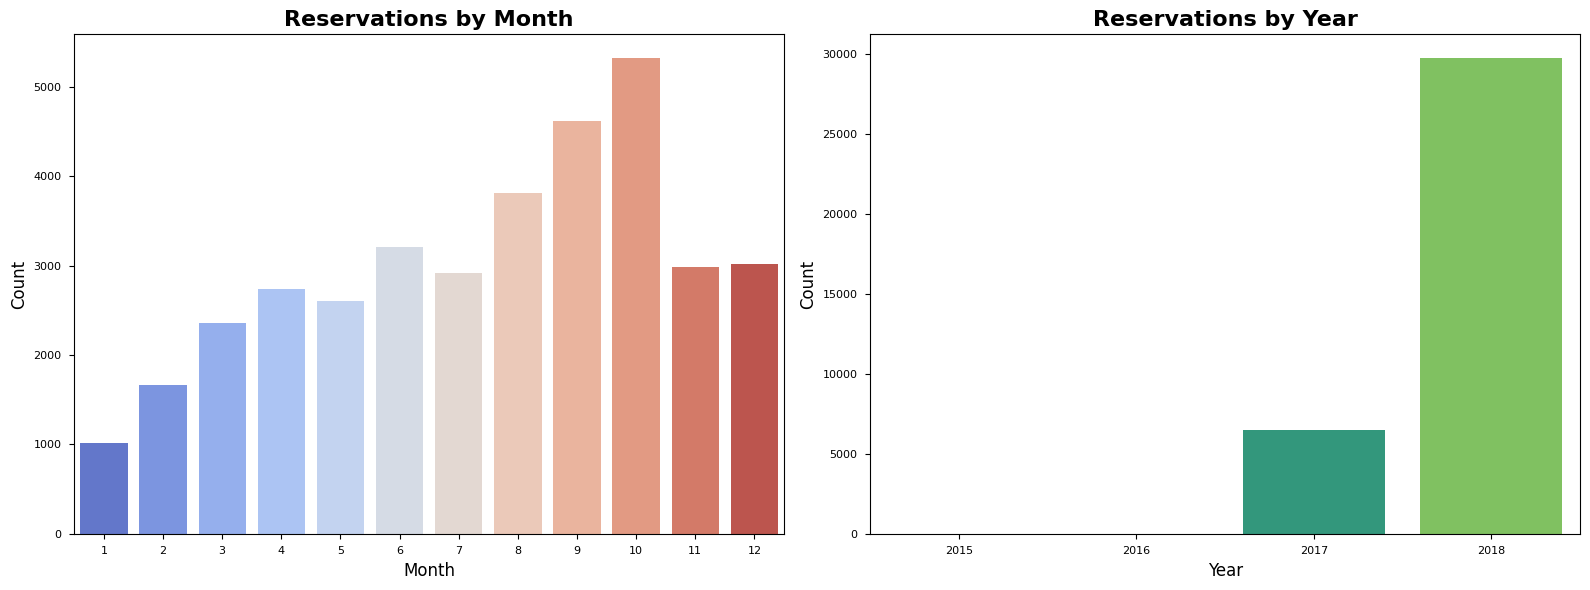


Frequency table for type of meal:
type of meal
Meal Plan 1     0.767187
Not Selected    0.141553
Meal Plan 2     0.091122
Meal Plan 3     0.000138
Name: proportion, dtype: float64

Frequency table for car parking space:
car parking space
0    0.969074
1    0.030926
Name: proportion, dtype: float64

Frequency table for room type:
room type
Room_Type 1    0.775574
Room_Type 4    0.166933
Room_Type 6    0.026595
Room_Type 2    0.019091
Room_Type 5    0.007256
Room_Type 7    0.004359
Room_Type 3    0.000193
Name: proportion, dtype: float64

Frequency table for market segment type:
market segment type
Online           0.640063
Offline          0.290250
Corporate        0.055479
Complementary    0.010759
Aviation         0.003448
Name: proportion, dtype: float64

Frequency table for repeated:
repeated
0    0.974454
1    0.025546
Name: proportion, dtype: float64

Frequency table for booking status:
booking status
Not_Canceled    0.672203
Canceled        0.327797
Name: proportion, dtype: floa

In [15]:
# Define expected column names
expected_categorical = ['type of meal', 'car parking space', 'room type', 'market segment type', 'repeated', 'booking status']
expected_numeric = ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 
                    'lead time', 'average price', 'special requests']
expected_date = 'date of reservation'

# Filter for existing columns
categorical_vars = [col for col in expected_categorical if col in df.columns]
numeric_vars = [col for col in expected_numeric if col in df.columns]
date_var = expected_date if expected_date in df.columns else None

# Categorical Variables
for var in categorical_vars:
    plot_categorical(df, var)

# Numeric Variables
for var in numeric_vars:
    if var in ['number of adults', 'number of children']:
        plot_numeric_histogram(df, var)
    else:
        plot_numeric(df, var)

# Date Variable
if date_var:
    plot_date(df, date_var)
    
# Frequency tables for categorical variables
for var in categorical_vars:
    print(f"\nFrequency table for {var}:")
    print(df[var].value_counts(normalize=True))

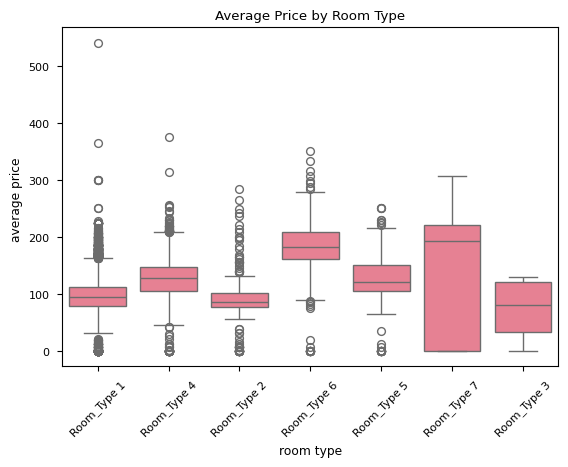

In [16]:
# Box plot for average price by room type
sns.boxplot(x=df['room type'], y=df['average price '], data=df)
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)
plt.show()

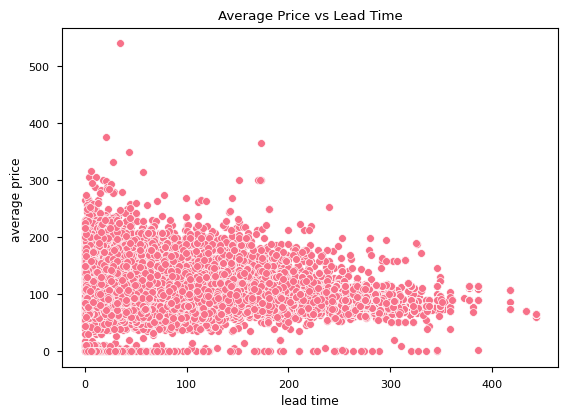

In [31]:
# Scatter plot for average price vs lead time
sns.scatterplot(x=df['lead time'], y=df['average price '], data=df)
plt.title('Average Price vs Lead Time')
plt.show()

In [33]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,year
0,INN00001,1,1,2,5,1.0,0,1,224,0,0,0,0,88.00,0,2015-10-02,0,10,2015
1,INN00002,1,0,1,3,0.0,0,1,5,1,0,0,0,106.68,1,2018-11-06,0,11,2018
2,INN00003,2,1,1,3,1.0,0,1,1,1,0,0,0,50.00,0,2018-02-28,1,2,2018
3,INN00004,1,0,0,2,1.0,0,1,211,1,0,0,0,100.00,1,2017-05-20,1,5,2017
4,INN00005,1,0,1,2,0.0,0,1,48,1,0,0,0,77.00,0,2018-04-11,1,4,2018


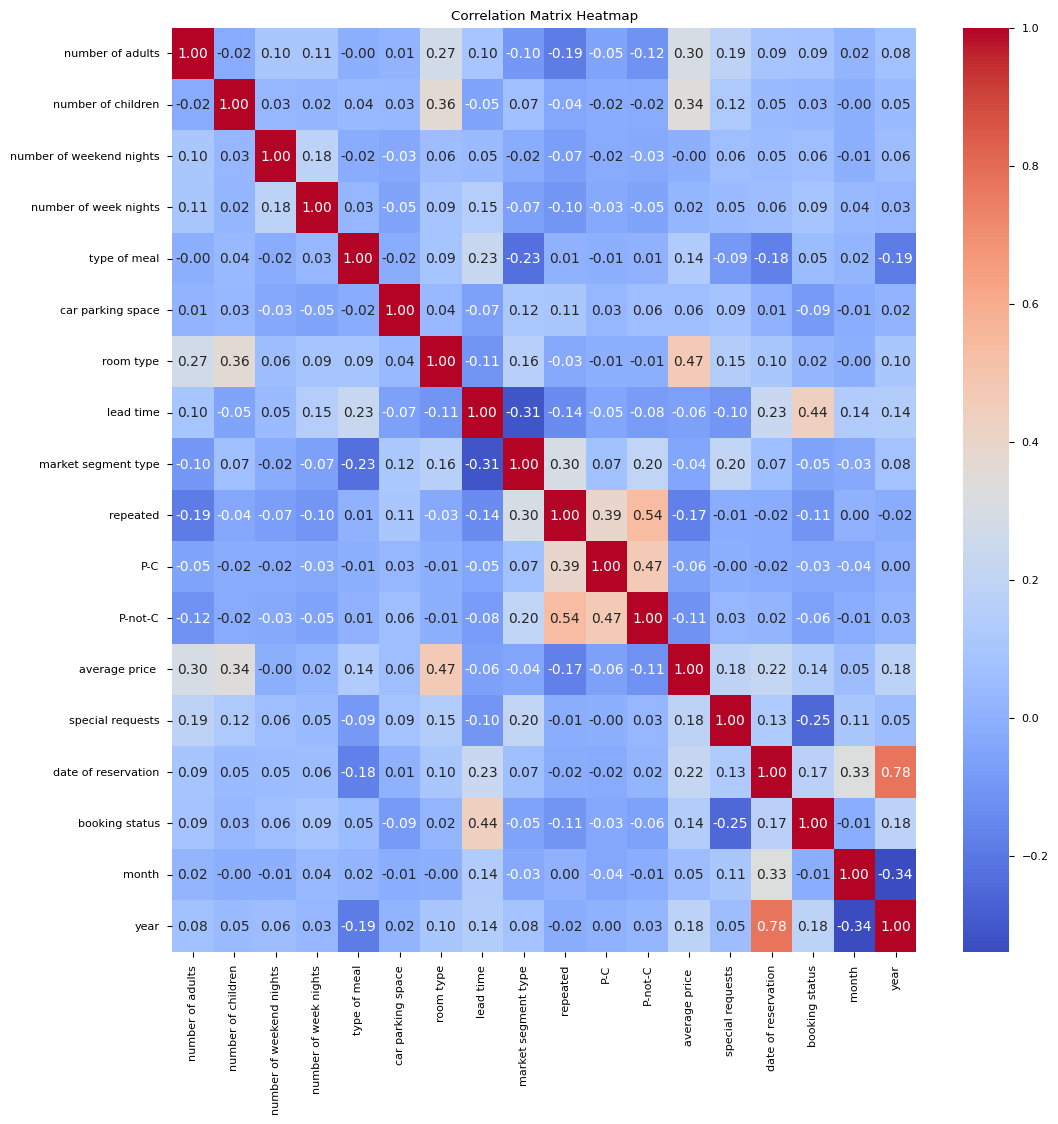

booking status              1.000000
lead time                   0.438581
year                        0.179575
date of reservation         0.172305
average price               0.142334
number of week nights       0.092749
number of adults            0.086542
number of weekend nights    0.061624
type of meal                0.049895
number of children          0.032954
room type                   0.023490
month                      -0.012128
P-C                        -0.033873
market segment type        -0.048258
P-not-C                    -0.060026
car parking space          -0.085984
repeated                   -0.107426
special requests           -0.253338
Name: booking status, dtype: float64


In [39]:
# Analyze correlation with the target variable 'booking status'
correlation_matrix = df.corr()
correlation_with_booking_status = correlation_matrix['booking status'].sort_values(ascending=False)

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()
print(correlation_with_booking_status)

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
df['room type'] = df['room type'].str.extract('(\d+)').astype(int) 
df['type of meal'] = df['type of meal'].map({'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Not Selected': 0})
df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2395/3139936875.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['room type'] = df['room type'].str.extract('(\d+)').astype(int)


In [19]:
df['market segment type'] = df['market segment type'].map( {'Offline' : 0 , 'Online' : 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4} )

In [20]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,year
0,INN00001,1,1,2,5,1.0,0,1,224,0,0,0,0,88.00,0,2015-10-02,0,10,2015
1,INN00002,1,0,1,3,0.0,0,1,5,1,0,0,0,106.68,1,2018-11-06,0,11,2018
2,INN00003,2,1,1,3,1.0,0,1,1,1,0,0,0,50.00,0,2018-02-28,1,2,2018
3,INN00004,1,0,0,2,1.0,0,1,211,1,0,0,0,100.00,1,2017-05-20,1,5,2017
4,INN00005,1,0,1,2,0.0,0,1,48,1,0,0,0,77.00,0,2018-04-11,1,4,2018


In [21]:
df.to_csv('data.csv', index=False)

In [22]:
df.dropna(inplace=True)

In [23]:
y = df['booking status']
X = df.drop(['booking status','date of reservation','Booking_ID'], axis=1)

scaler = StandardScaler()
numeric_features = ['number of adults', 'number of children', 'number of weekend nights',
                    'number of week nights', 'lead time', 'average price ', 'special requests']
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(28994, 16) (7249, 16)
(28994,) (7249,)


In [26]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,year
0,-1.629387,2.222169,1.365726,1.981360,1.0,0,1,1.613596,0,0,0,0,-0.440472,-0.788398,10,2015
1,-1.629387,-0.261581,0.217547,0.563778,0.0,0,1,-0.934057,1,0,0,0,0.092295,0.483136,11,2018
2,0.298525,2.222169,0.217547,0.563778,1.0,0,1,-0.980590,1,0,0,0,-1.524258,-0.788398,2,2018
3,-1.629387,-0.261581,-0.930632,-0.145012,1.0,0,1,1.462366,1,0,0,0,-0.098223,0.483136,5,2017
4,-1.629387,-0.261581,0.217547,-0.145012,0.0,0,1,-0.433833,1,0,0,0,-0.754199,-0.788398,4,2018


In [27]:
# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8013519106083598
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4966
           1       0.72      0.60      0.66      2283

    accuracy                           0.80      7249
   macro avg       0.78      0.75      0.76      7249
weighted avg       0.80      0.80      0.80      7249



/var/data/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


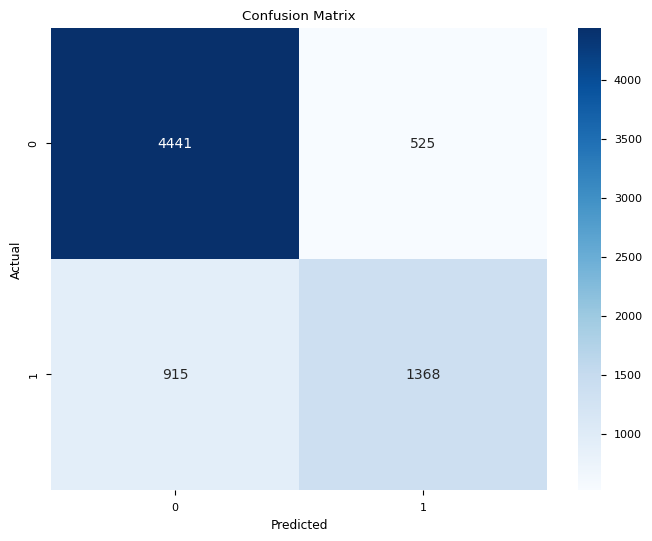

In [28]:
# Visualization 1: Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

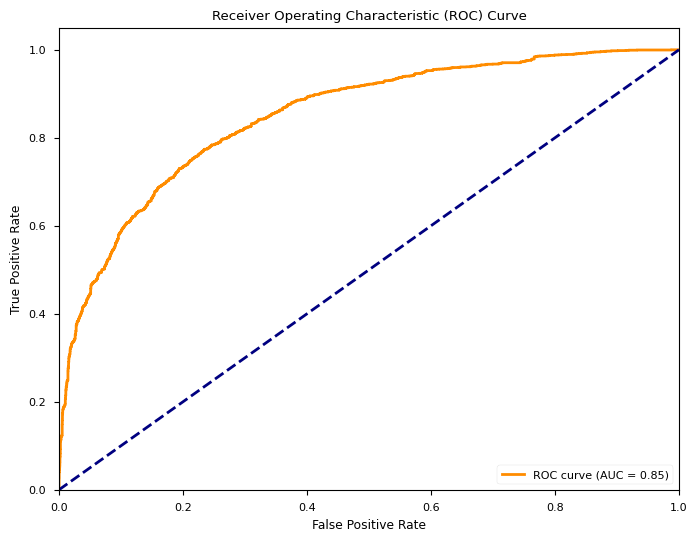

In [29]:
# Visualization 2: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

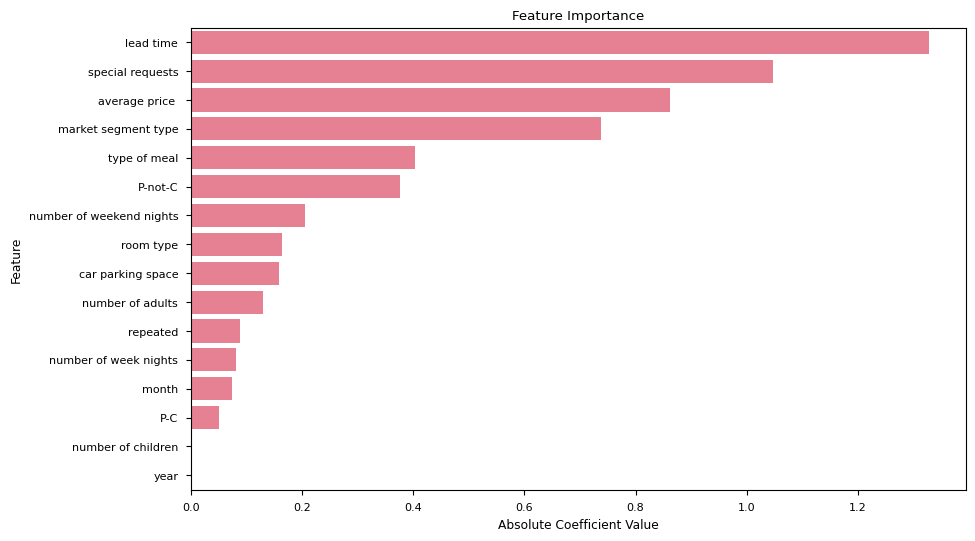

In [30]:
# Visualization 3: Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()